**Moon Landings**

(https://www.kaggle.com/code/rajatraj0502/moon-landings/notebook)

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\srini\OneDrive\kaggle\lunar_mission_project\Moonlanding.csv",
                 encoding="ISO-8859-1'")

In [3]:
df.columns

Index(['Mission', 'Spacecraft', 'Launch Date', 'Carrier Rocket', 'Operator',
       'Mission Type', 'Outcome', 'Additional Information'],
      dtype='object')

In [4]:
df.head(5)

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,1958-08-17,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,1958-09-23,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,1958-10-11,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,1958-10-11,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,1958-11-08,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


In [5]:
df.shape

(158, 8)

In [6]:
len(df.index)

158

***The dataset contains the following columns:***

<b>Mission:</b> The name of the mission.</br>
<b>Spacecraft:</b> The name of the spacecraft.</br>
<b>Launch Date:</b> The date the spacecraft was launched.</br>
<b>Carrier Rocket:</b> The name of the carrier rocket.</br>
<b>Operator:</b> The organization that operated the mission.</br>
<b>Mission Type:</b> The type of the mission (e.g., Orbiter, Impactor).</br>
<b>Outcome:</b> The outcome of the mission (e.g., Launch failure, Success).</br>
<b>Additional Information:</b> Additional information about the mission.</br>

In [7]:
# Convert 'Launch Date' to datetime
#print(df['Launch Date'].dtype)
df['Launch Date'] = pd.to_datetime(df['Launch Date'],errors='coerce')


In [8]:
# Drop rows with missing 'Launch Date'
df = df.dropna(subset=['Launch Date'])

In [9]:
df['Year'] = df['Launch Date'].dt.year 


In [10]:
print(df['Launch Date'].dtype)


datetime64[ns]


In [11]:
mission_per_year_count = df['Year'].value_counts().sort_index()

In [12]:
mission_per_year_count

Year
1958     7
1959     6
1960     4
1962     3
1963     3
1964     3
1965     9
1966    11
1967    10
1968     7
1969     9
1970     5
1971     5
1972     5
1973     3
1974     1
1975     2
1976     1
1978     1
1990     2
1992     1
1994     2
1997     1
1998     2
2001     1
2003     1
2006     2
2007     6
2008     2
2009     2
2010     1
2011     2
2013     3
2014     3
2018     6
2019     2
2020     4
2022    17
2023     3
Name: count, dtype: int64

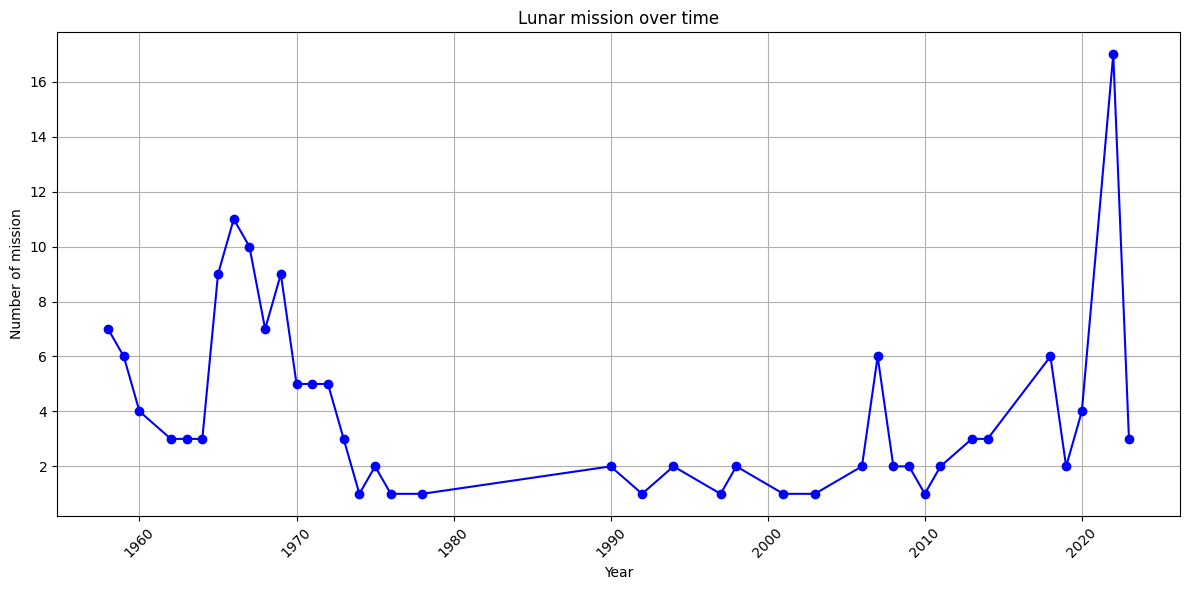

In [13]:
# Plot the number of missions over time
plt.figure(figsize=(12,6))
plt.plot(mission_per_year_count.index,
        mission_per_year_count.values,
        marker='o',
        linestyle='-',color='b')
plt.title('Lunar mission over time')
plt.xlabel('Year')
plt.ylabel('Number of mission')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Create a new column 'Success' that is 1 if the mission was a success and 0 otherwise
df['Success'] = df['Outcome'].apply(lambda x:1 if 'Success' in x else 0)

In [15]:
df['Success']

0      0
1      0
2      0
3      0
4      0
      ..
153    0
154    0
155    0
156    0
157    0
Name: Success, Length: 158, dtype: int64

In [16]:
success_rate_per_year = df.groupby('Year')['Success'].mean()

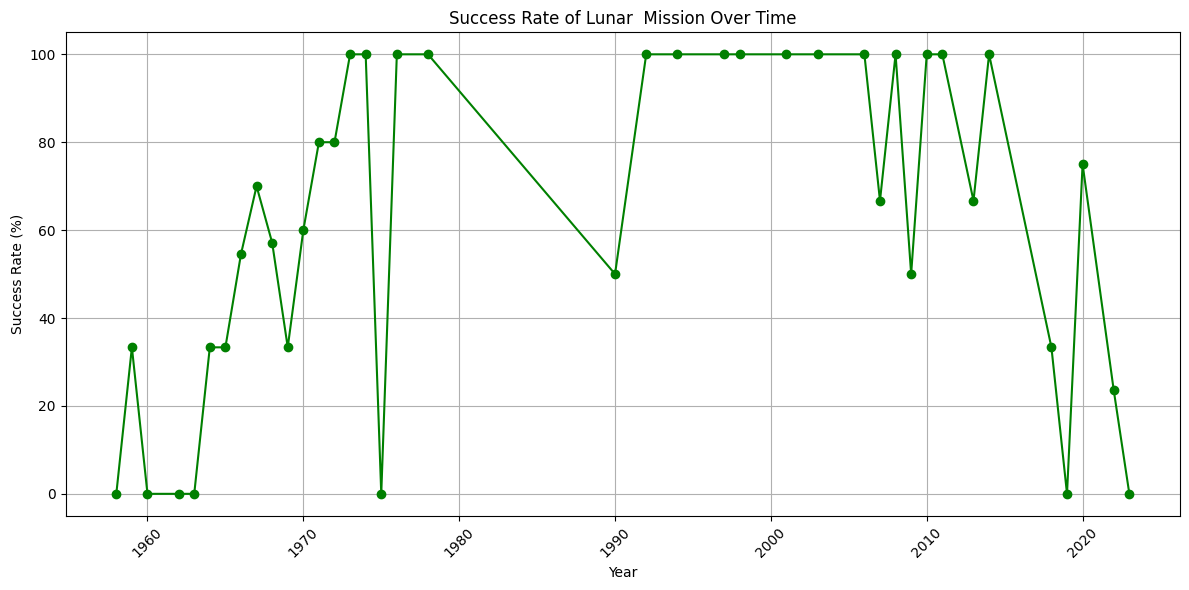

In [17]:
# Plot the success rate over time
plt.figure(figsize=(12,6))
plt.plot(success_rate_per_year.index,success_rate_per_year.values *100 ,
        marker='o',linestyle='-',color='g')
plt.title("Success Rate of Lunar  Mission Over Time")
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Count the number of missions by operator
mission_by_operator = df['Operator'].value_counts()

In [19]:
mission_by_operator

Operator
United States NASA               61
Soviet Union Lavochkin           39
China CNSA                       15
Soviet Union OKB-1               15
Japan JAXA                        5
India ISRO                        4
Japan ISAS                        3
European Union ESA                2
Italy ASI                         1
UAE UAESA/MBRSC                   1
Japan Tomy/JAXA/Dodai             1
Japan ispace                      1
United States Fluid & Reason      1
United States Lockheed Martin     1
United States USAF                1
South Korea KARI                  1
Israel SpaceIL                    1
Luxembourg LuxSpace               1
United States Hughes              1
United States USAF/NASA           1
Japan United States ISAS/NASA     1
Russia Roscosmos                  1
Name: count, dtype: int64

In [20]:
# Select the top 10 operators with the most missions
top_operator = mission_by_operator.head(10)

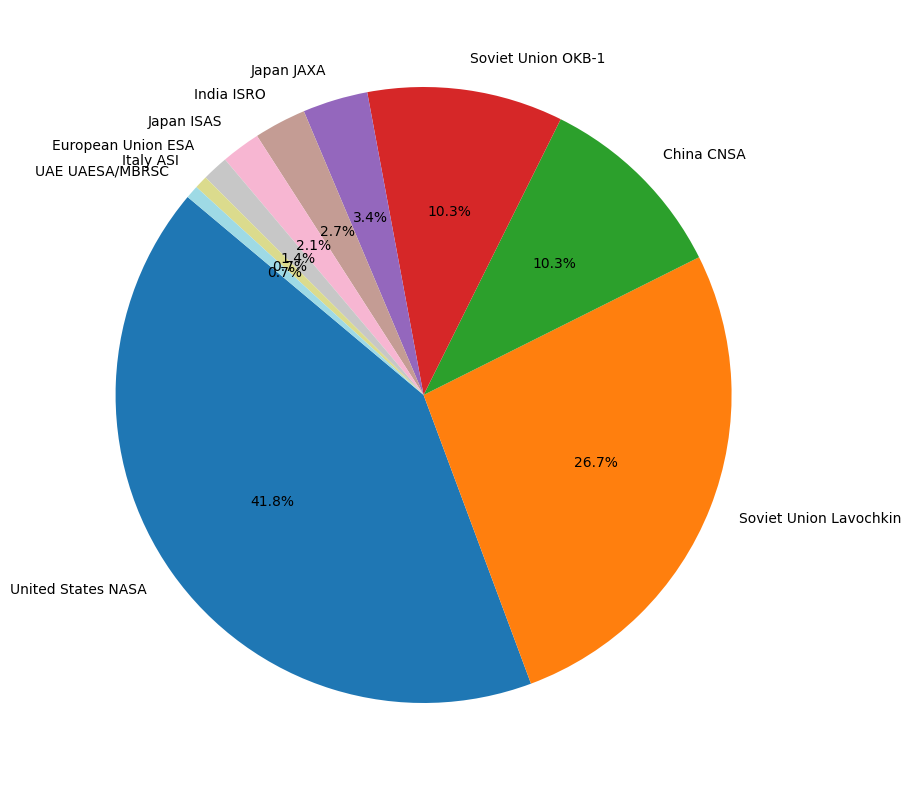

In [21]:
# Plot the number of missions by operator
plt.figure(figsize=(10,10))
top_operator.plot.pie(autopct='%1.1f%%',startangle=140,cmap='tab20')
plt.ylabel('')
plt.show()

In [22]:
# Count the number of missions by outcome
mission_by_outcome = df['Outcome'].value_counts()

In [23]:
mission_by_outcome

Outcome
Successful            78
Launch failure        31
Spacecraft failure    28
Operational           14
Partial failure        6
En route               1
Name: count, dtype: int64

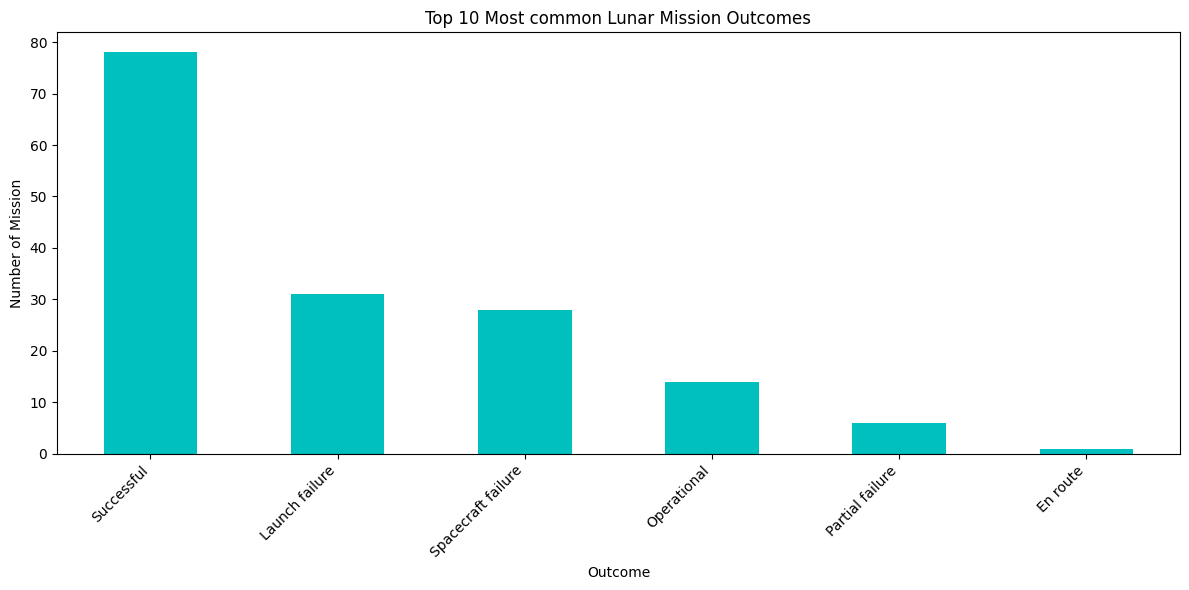

In [24]:
top_outcome = mission_by_outcome.head(10)
plt.figure(figsize=(12,6))
top_outcome.plot.bar(color='c')
plt.title ('Top 10 Most common Lunar Mission Outcomes')
plt.xlabel('Outcome')
plt.ylabel("Number of Mission")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [25]:
mission_by_type_year =  df.groupby(['Year','Mission Type']).size().unstack()

<Figure size 1400x800 with 0 Axes>

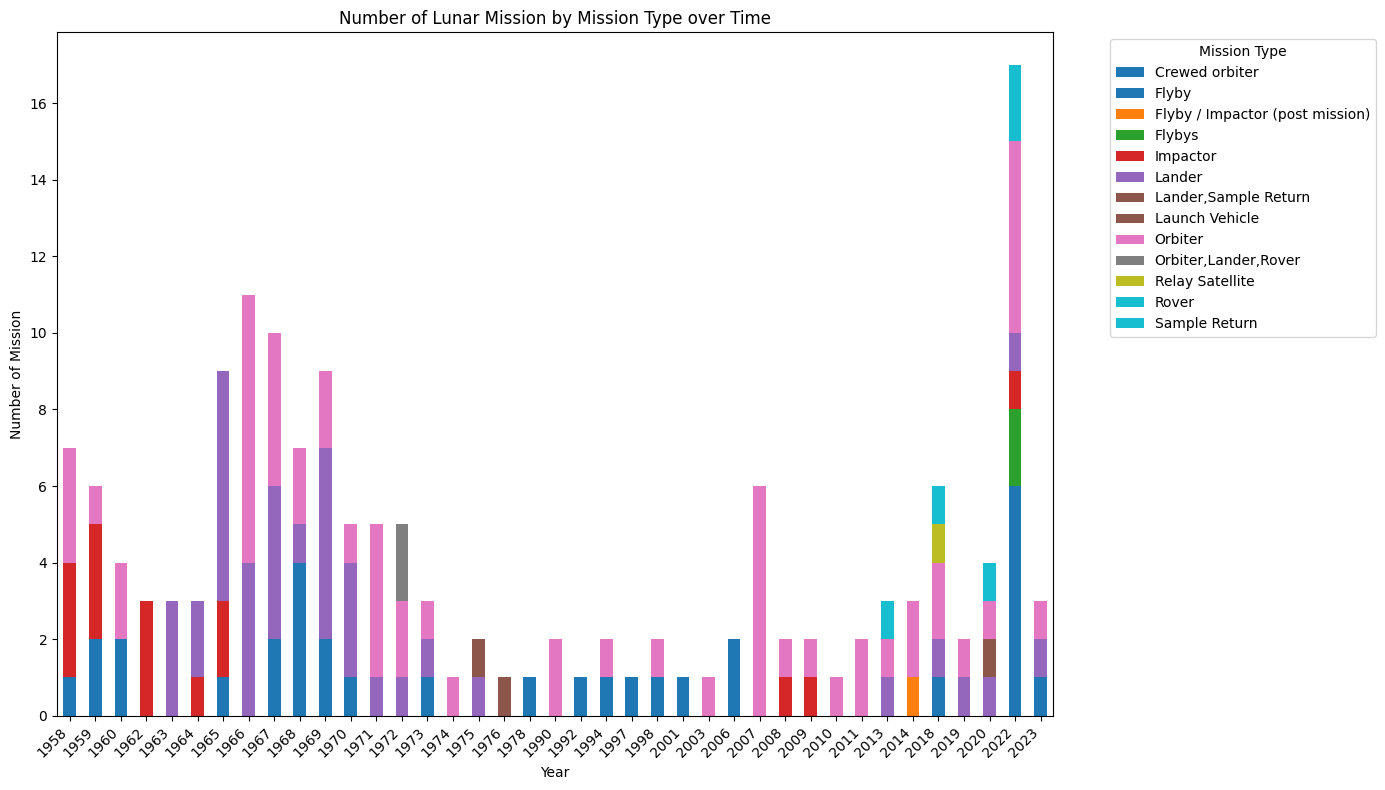

In [29]:
plt.figure(figsize=(14,8))
mission_by_type_year.plot(kind='bar',stacked=True,figsize=(14,8),cmap='tab10')
plt.title("Number of Lunar Mission by Mission Type over Time")
plt.xlabel('Year')
plt.ylabel('Number of Mission')
plt.legend(title='Mission Type',bbox_to_anchor=(1.05,1),loc='upper left')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()